## Numberplate Detection model

Importing dependancies

In [1]:
# import os
# import numpy as np
# import pandas as pd
# import seaborn as sns
#
# from sklearn.model_selection import train_test_split
# from matplotlib import pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,InputLayer,Flatten
# from tensorflow.keras.activations import relu,sigmoid
# from tensorflow.keras.losses import binary_crossentropy
# from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.metrics import binary_accuracy

In [1]:
import cv2
import numpy as np
import easyocr
import imutils

from matplotlib import pyplot as plt

### Reading image and turn it into gray scale

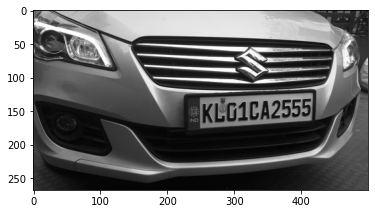

In [31]:
img = cv2.imread('../data/License-plate/images/Cars0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Finding edges in this picture

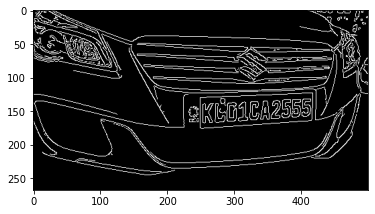

In [32]:
bfilter = cv2.bilateralFilter(gray,11,17,17)
edge = cv2.Canny(bfilter ,30,200)

plt.imshow(cv2.cvtColor(edge,cv2.COLOR_BGR2RGB))

In [33]:
cont1 = cv2.findContours(edge.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(cont1)
contours = sorted(contours,key=cv2.contourArea,reverse=True)[:10]

### detecting the numberplate from selected contour

In [34]:
numberplate = None
for contour in contours:
    rectangle = cv2.approxPolyDP(contour,10,True)
    if len(rectangle)==4:
        numberplate = rectangle
        break

In [35]:
numberplate

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [36]:
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask,[numberplate],0,255,-1)
new_img = cv2.bitwise_and(img,img,mask=mask)

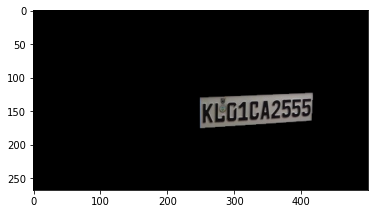

In [37]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))